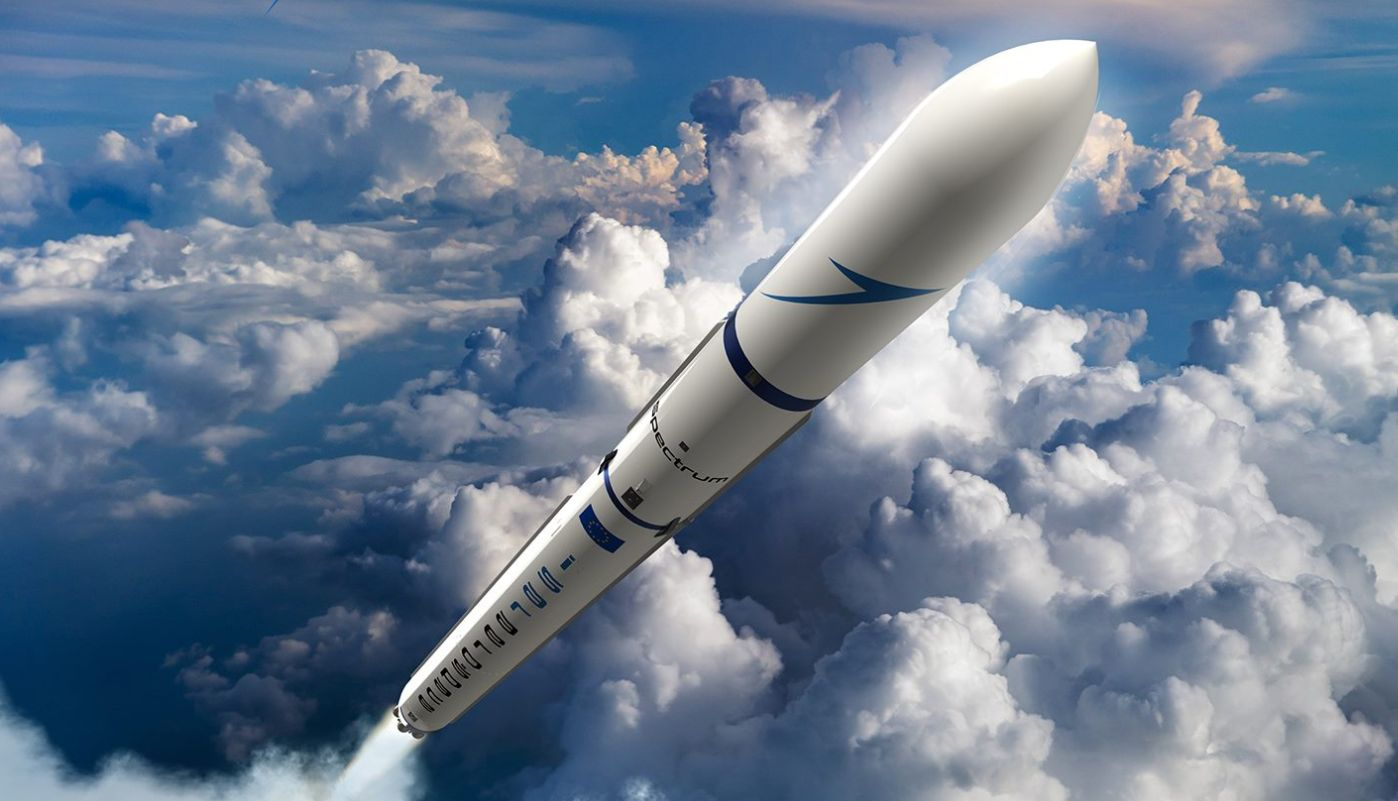

# Importing libraries and data exploration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_palette(palette='deep',n_colors=16,desat=0.8)
%matplotlib inline

missions = pd.read_csv('Space_Corrected.csv')
missions.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [2]:
#looking for missing values and data types
missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [3]:
#finding companies that launch rockets in descending order
companies = missions['Company Name'].value_counts()
companies

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ESA                   13
Rocket Lab            13
ISA                   13
Eurockot              13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
JAXA                   7
MITT                   7
Land Launch            7
KCST                   5
CASIC                  5
UT                     5
Arm??e de l'Air        4
CECLES                 4
Exos                   4


In [4]:
#getting countries
missions['Country'] = missions['Location'].apply(lambda location : location.split(', ')[-1])
#finding years
missions['Year'] = pd.to_datetime(missions['Datum']).apply(lambda year: year.year)
missions.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Kazakhstan,2020
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,2020
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,2020
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Japan,2020


In [5]:
missions['Year'].value_counts()

1971    119
2018    117
1977    114
1976    113
1975    113
       ... 
2005     37
2010     37
1958     28
1959     20
1957      3
Name: Year, Length: 64, dtype: int64

# Data Visualization

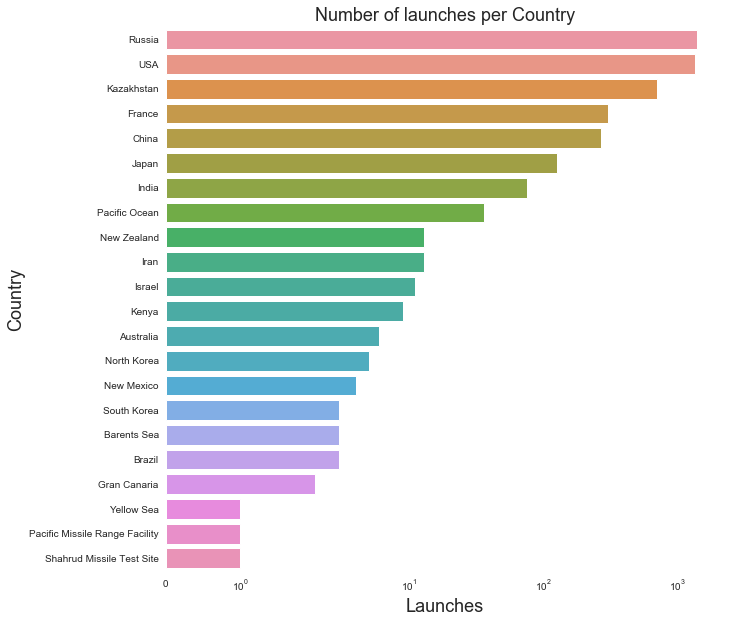

In [6]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Country',data=missions,order=missions['Country'].value_counts().index)
ax.set_title('Number of launches per Country',fontsize=18)
ax.set_xlabel('Launches',fontsize=18)
ax.set_ylabel('Country',fontsize=18)
ax.set_xscale('symlog')
ax.set_frame_on(False)
plt.show()

# Launches per Year

As we can see in the plot, 1971 was the year with more launches due to the Cold War and two years after USA landed on the Moon.

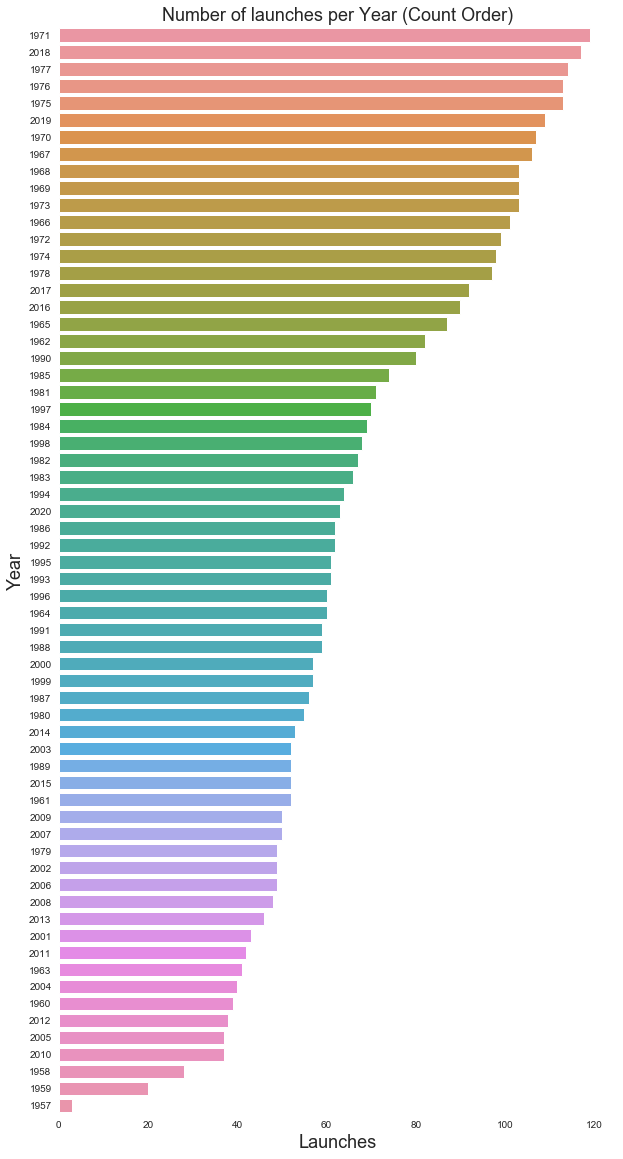

In [7]:
plt.figure(figsize=(10,20))
ax = sns.countplot(y='Year',data=missions,order=missions['Year'].value_counts().index)
ax.set_xscale('linear')
ax.set_title('Number of launches per Year (Count Order)',fontsize=18)
ax.set_xlabel('Launches',fontsize=18)
ax.set_ylabel('Year',fontsize=18)
ax.set_frame_on(False)
plt.show()

# Private companies break into space race

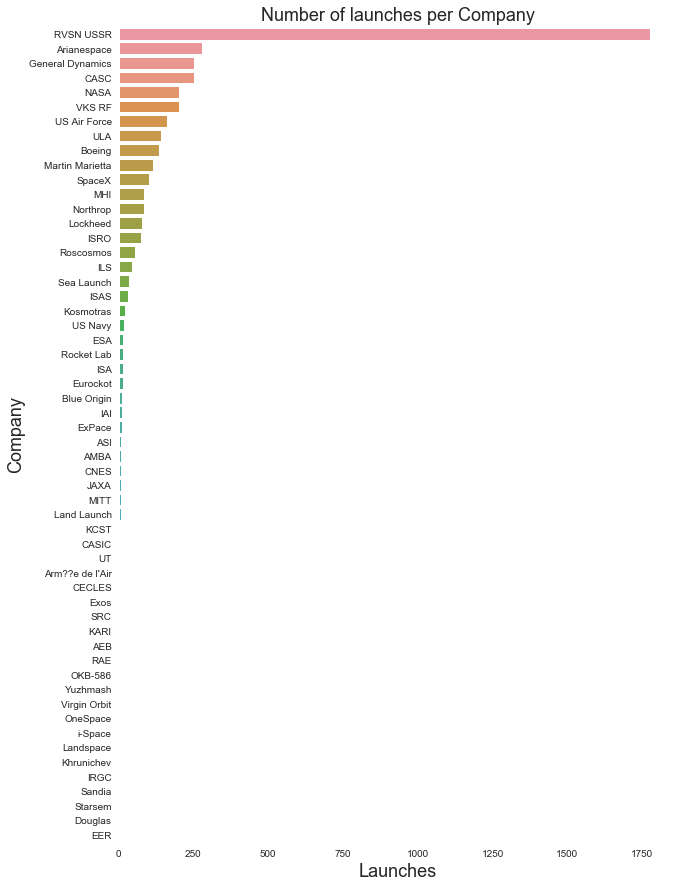

In [8]:
plt.figure(figsize=(10,15))
ax = sns.countplot(y='Company Name',data=missions,order=missions['Company Name'].value_counts().index)
ax.set_xscale('linear')
ax.set_title('Number of launches per Company',fontsize=18)
ax.set_xlabel('Launches',fontsize=18)
ax.set_ylabel('Company',fontsize=18)
ax.set_frame_on(False)
plt.show()

# Mission Sucess vs. Mission Failure

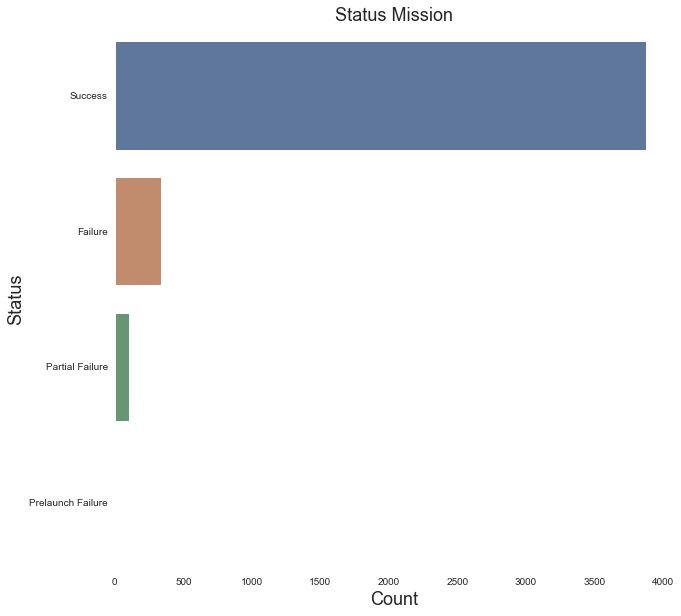

In [9]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Status Mission',data=missions,order=missions['Status Mission'].value_counts().index)
ax.set_xscale('linear')
ax.set_title('Status Mission',fontsize=18)
ax.set_xlabel('Count',fontsize=18)
ax.set_ylabel('Status',fontsize=18)
ax.set_frame_on(False)
plt.show()

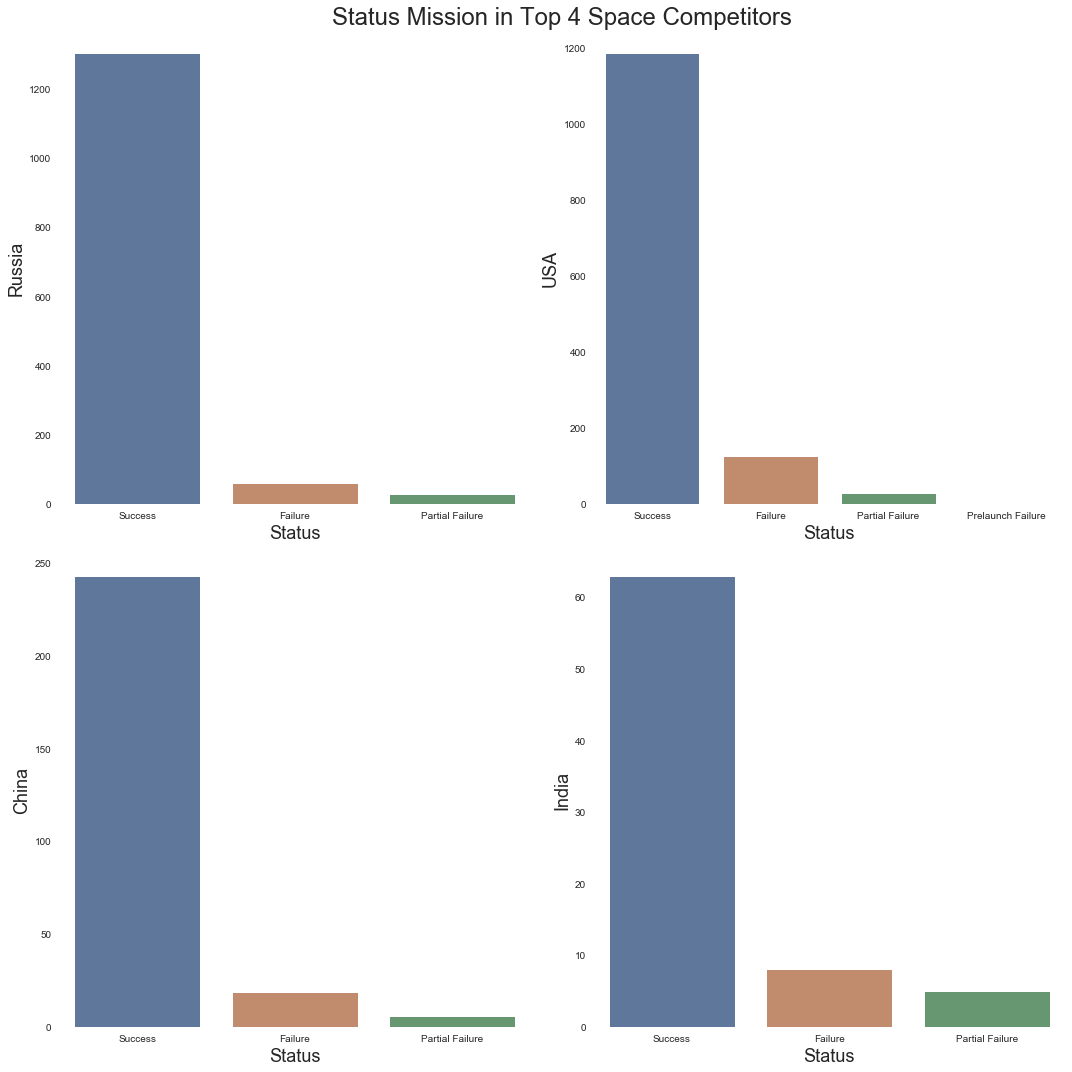

In [10]:
Russia = missions[missions['Country']=='Russia']
USA = missions[missions['Country']=='USA']
China = missions[missions['Country']=='China']
India = missions[missions['Country']=='India']


fig = plt.figure(figsize=(15,15),frameon=False,tight_layout=True,clear=True)
plt.axis('off')
plt.title("Status Mission in Top 4 Space Competitors",fontsize=24)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.countplot(x='Status Mission',data=Russia,order=Russia['Status Mission'].value_counts().index,ax=ax1)
ax1.set_yscale('linear')
ax1.set_ylabel("Russia",fontsize=18)
ax1.set_xlabel('Status',fontsize=18)
ax1.set_frame_on(False)


sns.countplot(x='Status Mission',data=USA,order=USA['Status Mission'].value_counts().index,ax=ax2)
ax2.set_yscale('linear')
ax2.set_ylabel("USA",fontsize=18)
ax2.set_xlabel('Status',fontsize=18)
ax2.set_frame_on(False)


sns.countplot(x='Status Mission',data=China,order=China['Status Mission'].value_counts().index,ax=ax3)
ax3.set_yscale('linear')
ax3.set_ylabel("China",fontsize=18)
ax3.set_xlabel('Status',fontsize=18)
ax3.set_frame_on(False)


sns.countplot(x='Status Mission',data=India,order=India['Status Mission'].value_counts().index,ax=ax4)
ax4.set_yscale('linear')
ax4.set_ylabel("India",fontsize=18)
ax4.set_xlabel('Status',fontsize=18)
ax4.set_frame_on(False)



# Rockets Active vs. Rockets Retired

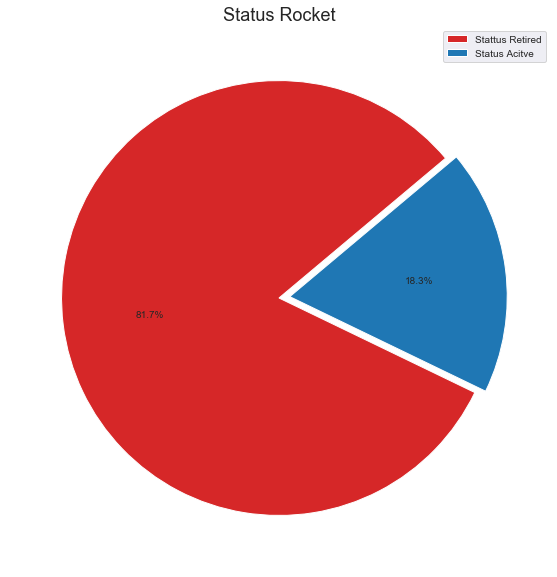

In [11]:
plt.figure(figsize=(10,10))
st = missions['Status Rocket'].value_counts()
plt.pie(st,shadow=False,autopct='%1.1f%%',colors=('tab:red', 'tab:blue'),explode=(0,0.05),startangle=40)
plt.legend(['Stattus Retired','Status Acitve'])
plt.title('Status Rocket', fontsize=18)
plt.show()